In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('weather.csv')
df

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3           DISCOVERY ISLAND  48.425 -123.226   BC   NaN   NaN  NaN  12.5   
4        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1336                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1337                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1338                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1339            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1340                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...   DwP    P%N   S_G    Pd  BS  DwBS  BS%     HDD  CDD  \
0      0.0   1.0  ...   0.0    NaN   0.0  12.0 NaN   NaN  NaN   273.3  0.0   
1      0.0  -3.0  ...   0.0  104.0   0.0  12.0 NaN   NaN  NaN   307.0  0.0   
2      9.0  -2.5  ...   9.0    NaN   NaN  11.0 NaN   NaN  NaN   168.1  0.0   
3      0.0   NaN  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN     NaN  NaN   
4      2.0  -1.0  ...   2.0    NaN   NaN  11.0 NaN   NaN  NaN   267.7  0.0   
...    ...   ...  ...   ...    ...   ...   ...  ..   ...  ...     ...  ...   
1336   0.0 -33.5  ...   0.0   66.0  74.0   5.0 NaN   NaN  NaN  1136.5  0.0   
1337  17.0   NaN  ...  17.0    NaN   NaN   4.0 NaN   NaN  NaN   148.7  0.0   
1338   1.0 -32.3  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1101.2  0.0   
1339   1.0 -32.5  ...   NaN    NaN   NaN   NaN NaN   NaN  NaN  1060.0  0.0   
1340   0.0 -46.8  ...   0.0    NaN   NaN   2.0 NaN   NaN  NaN  1279.9  0.0   

       Stn_No  
0     1011500  
1     1012040  
2     1012055  
3     1012475  
4     1012573  
...       ...  
1336  8502800  
1337  8502801  
1338  8503249  
1339  8503992  
1340  8504177  

[1341 rows x 25 columns]

In [3]:
df = df[pd.notnull(df['Tm'])]
df = df.reset_index(drop=True)

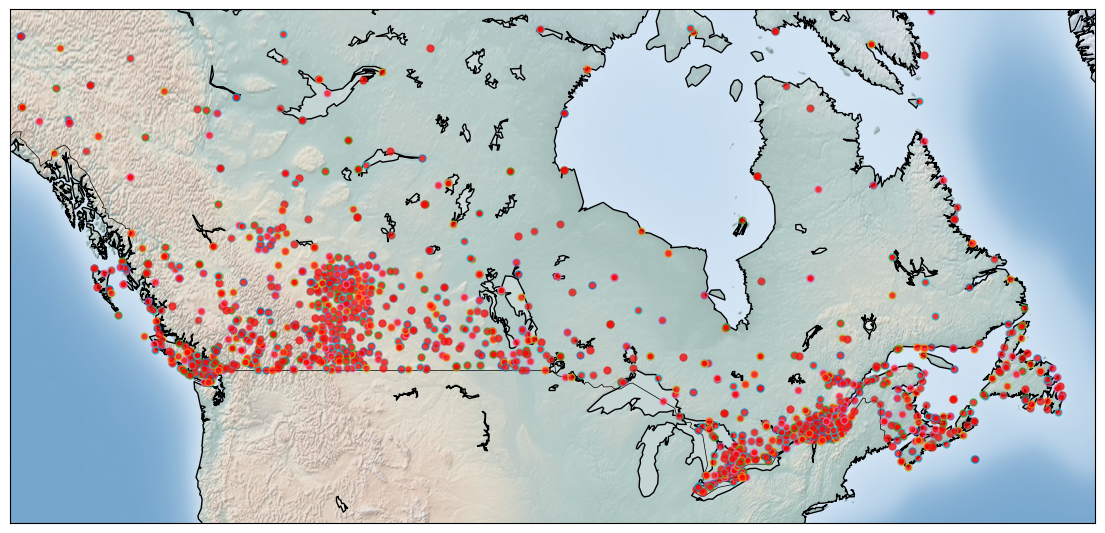

In [4]:
def plot_map(df):
    rcParams['figure.figsize'] = (14, 10)

    llon = -140
    ulon = -50
    llat = 40
    ulat = 65

    df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)]

    my_map = Basemap(
        projection='merc',
        resolution='l',
        area_thresh=1000.0,
        llcrnrlon=llon,
        llcrnrlat=llat,  # min longitude (llcrnrlon) and latitude (llcrnrlat)
        urcrnrlon=ulon,
        urcrnrlat=ulat
    )  # max longitude (urcrnrlon) and latitude (urcrnrlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    # my_map.drawmapboundary()
    my_map.fillcontinents(color='white', alpha=0.3)
    my_map.shadedrelief()

    # To collect data based on stations

    xs, ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
    df['xm'] = xs.tolist()
    df['ym'] = ys.tolist()

    # Visualization1
    for index, row in df.iterrows():
        #   x,y = my_map(row.Long, row.Lat)
        my_map.plot(
            row.xm,
            row.ym,
            markerfacecolor=([1, 0, 0]),
            marker='o',
            markersize=5,
            alpha=0.75
        )

    # plt.text(x,y,stn)
    plt.show()

    return ((llon, ulon, llat, ulat), df)

(llon, ulon, llat, ulat), df = plot_map(df.copy())


In [5]:
sklearn.utils.check_random_state(1000)

RandomState(MT19937) at 0x1B1DF4DB040

In [6]:
Clus_dataSet = df[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)

scaler = StandardScaler()
Clus_dataSet = scaler.fit_transform(Clus_dataSet)

Clus_dataSet

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [12]:
db = DBSCAN(eps=0.15, min_samples=10)
db.fit(Clus_dataSet)

DBSCAN(eps=0.15, min_samples=10)

In [14]:
df['cluster'] = db.labels_
df

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...    Pd  BS  DwBS  BS%     HDD  CDD   Stn_No  \
0      0.0   1.0  ...  12.0 NaN   NaN  NaN   273.3  0.0  1011500   
1      0.0  -3.0  ...  12.0 NaN   NaN  NaN   307.0  0.0  1012040   
2      9.0  -2.5  ...  11.0 NaN   NaN  NaN   168.1  0.0  1012055   
3      2.0  -1.0  ...  11.0 NaN   NaN  NaN   267.7  0.0  1012573   
4      0.0   1.9  ...  12.0 NaN   NaN  NaN   258.6  0.0  1012710   
...    ...   ...  ...   ...  ..   ...  ...     ...  ...      ...   
1251   0.0 -33.5  ...   5.0 NaN   NaN  NaN  1136.5  0.0  8502800   
1252  17.0   NaN  ...   4.0 NaN   NaN  NaN   148.7  0.0  8502801   
1253   1.0 -32.3  ...   NaN NaN   NaN  NaN  1101.2  0.0  8503249   
1254   1.0 -32.5  ...   NaN NaN   NaN  NaN  1060.0  0.0  8503992   
1255   0.0 -46.8  ...   2.0 NaN   NaN  NaN  1279.9  0.0  8504177   

                xm            ym  cluster  
0     1.807806e+06  1.396332e+06        0  
1     1.764329e+06  1.377564e+06        0  
2     1.773336e+06  1.378409e+06        0  
3     1.809363e+06  1.362546e+06        0  
4     1.841498e+06  1.311615e+06        0  
...            ...           ...      ...  
1251  8.708449e+06  2.799614e+06       -1  
1252  8.708560e+06  2.799815e+06       -1  
1253  8.608040e+06  3.168105e+06       -1  
1254  9.078172e+06  2.438267e+06       -1  
1255  8.132237e+06  2.100471e+06       -1  

[1189 rows x 28 columns]

In [15]:
df['cluster'].value_counts()

cluster
 0    511
 3    360
-1    215
 4     42
 1     38
 2     23
Name: count, dtype: int64

In [17]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
df['cluster'] = core_samples_mask
df

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...    Pd  BS  DwBS  BS%     HDD  CDD   Stn_No  \
0      0.0   1.0  ...  12.0 NaN   NaN  NaN   273.3  0.0  1011500   
1      0.0  -3.0  ...  12.0 NaN   NaN  NaN   307.0  0.0  1012040   
2      9.0  -2.5  ...  11.0 NaN   NaN  NaN   168.1  0.0  1012055   
3      2.0  -1.0  ...  11.0 NaN   NaN  NaN   267.7  0.0  1012573   
4      0.0   1.9  ...  12.0 NaN   NaN  NaN   258.6  0.0  1012710   
...    ...   ...  ...   ...  ..   ...  ...     ...  ...      ...   
1251   0.0 -33.5  ...   5.0 NaN   NaN  NaN  1136.5  0.0  8502800   
1252  17.0   NaN  ...   4.0 NaN   NaN  NaN   148.7  0.0  8502801   
1253   1.0 -32.3  ...   NaN NaN   NaN  NaN  1101.2  0.0  8503249   
1254   1.0 -32.5  ...   NaN NaN   NaN  NaN  1060.0  0.0  8503992   
1255   0.0 -46.8  ...   2.0 NaN   NaN  NaN  1279.9  0.0  8504177   

                xm            ym  cluster  
0     1.807806e+06  1.396332e+06     True  
1     1.764329e+06  1.377564e+06     True  
2     1.773336e+06  1.378409e+06     True  
3     1.809363e+06  1.362546e+06     True  
4     1.841498e+06  1.311615e+06     True  
...            ...           ...      ...  
1251  8.708449e+06  2.799614e+06    False  
1252  8.708560e+06  2.799815e+06    False  
1253  8.608040e+06  3.168105e+06    False  
1254  9.078172e+06  2.438267e+06    False  
1255  8.132237e+06  2.100471e+06    False  

[1189 rows x 28 columns]

In [30]:
labels = db.labels_
df['cluster'] = labels

In [31]:
# Number of clusters in labels, ignoring noise if present.
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)

# Remove repetition in labels by turning it into a set.
clusterNum = len(set(labels))

# A sample of clusters
df[['Stn_Name', 'Tx', 'Tm', 'cluster']].head(5)

Stn_Name    Tx   Tm  cluster
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [33]:
set(labels)

{-1, 0, 1, 2, 3, 4}

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


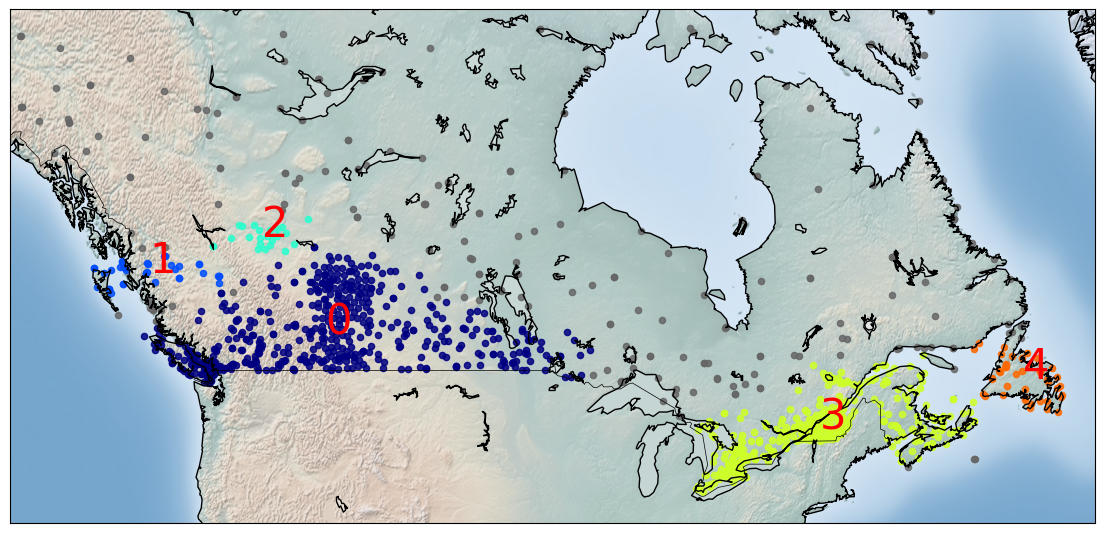

In [34]:
# Visualisation of clusters based on location
def plot_clusters_map(llon, ulon, llat, ulat, labels):
    rcParams['figure.figsize'] = (14, 10)

    my_map = Basemap(
        projection='merc',
        resolution='l',
        area_thresh=1000.0,
        llcrnrlon=llon,
        llcrnrlat=llat,  # min longitude (llcrnrlon) and latitude (llcrnrlat)
        urcrnrlon=ulon,
        urcrnrlat=ulat
    )  # max longitude (urcrnrlon) and latitude (urcrnrlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    #my_map.drawmapboundary()
    my_map.fillcontinents(color='white', alpha=0.3)
    my_map.shadedrelief()

    # To create a color map
    colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

    #Visualization1
    for clust_number in set(labels):
      
        c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]

        clust_set = df[df.cluster == clust_number]
        my_map.scatter(
            clust_set.xm, clust_set.ym, color=c, marker='o', s=20, alpha=0.85
        )
        if clust_number != -1:
            cenx = np.mean(clust_set.xm)
            ceny = np.mean(clust_set.ym)
            plt.text(
                cenx,
                ceny,
                str(clust_number),
                fontsize=30,
                color='red',
                  )
            print(
                "Cluster " + str(clust_number) + ', Avg Temp: ' +
                str(np.mean(clust_set.Tm))
            )


plot_clusters_map(llon, ulon, llat, ulat, labels)

In [49]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [50]:
min_samples = np.arange(2, 20, step=3)
min_samples 

array([ 2,  5,  8, 11, 14, 17])

In [51]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [52]:
N = len(combinations)
N

90

In [53]:
def get_scores_and_labels(combinations, Clus_dataSet):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(Clus_dataSet)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(Clus_dataSet, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, Clus_dataSet)

Combination (0.01, 2) on iteration 1 of 90 has 164 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 1 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 85 clusters. Moving on
Index: 7, Score: -0.045846706219902666, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 18
Index: 8, Score: -0.10981113778264079, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 10
Index: 9, Score: -0.06594256606879997, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 7
Index: 10, Score: -0.09121155925432994, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 7
Index: 11, Score: -0.14218423700143773, Labels: [ 0  0  0 ... -1 -1 -1], NumClusters: 5
Index: 12, Score: 0.08674276025132568, Labels: [ 0  0  0

In [54]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

cluster
 0    611
 1    440
-1    138
Name: count, dtype: int64

In [55]:
N = len(combinations)
N

90

In [56]:
best_dict

{'best_epsilon': 0.22214285714285714,
 'best_min_samples': 14,
 'best_labels': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64),
 'best_score': 0.5822923054243575}

In [57]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

cluster
 0    611
 1    440
-1    138
Name: count, dtype: int64

In [63]:
db = DBSCAN(eps=0.22214285714285714, min_samples=14)
db.fit(Clus_dataSet)

DBSCAN(eps=0.22214285714285714, min_samples=14)

In [64]:
df['cluster'] = db.labels_
df

Stn_Name     Lat     Long Prov    Tm  DwTm    D    Tx  \
0                  CHEMAINUS  48.935 -123.742   BC   8.2   0.0  NaN  13.5   
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC   7.0   0.0  3.0  15.0   
2              LAKE COWICHAN  48.829 -124.052   BC   6.8  13.0  2.8  16.0   
3        DUNCAN KELVIN CREEK  48.735 -123.728   BC   7.7   2.0  3.4  14.5   
4          ESQUIMALT HARBOUR  48.432 -123.439   BC   8.8   0.0  NaN  13.1   
...                      ...     ...      ...  ...   ...   ...  ...   ...   
1251                  NAIN A  56.550  -61.683   NL -22.6   0.0 -5.2  -6.8   
1252                  NAIN A  56.551  -61.682   NL -19.2  24.0  NaN  -7.5   
1253                  SAGLEK  58.333  -62.586   NL -24.4   2.0  NaN -13.5   
1254            TUKIALIK BAY  54.716  -58.358   NL -22.8   2.0  NaN  -5.8   
1255                WABUSH A  52.923  -66.865   NL -27.7   0.0  NaN -13.6   

      DwTx    Tn  ...  BS  DwBS  BS%     HDD  CDD   Stn_No            xm  \
0      0.0   1.0  ... NaN   NaN  NaN   273.3  0.0  1011500  1.807806e+06   
1      0.0  -3.0  ... NaN   NaN  NaN   307.0  0.0  1012040  1.764329e+06   
2      9.0  -2.5  ... NaN   NaN  NaN   168.1  0.0  1012055  1.773336e+06   
3      2.0  -1.0  ... NaN   NaN  NaN   267.7  0.0  1012573  1.809363e+06   
4      0.0   1.9  ... NaN   NaN  NaN   258.6  0.0  1012710  1.841498e+06   
...    ...   ...  ...  ..   ...  ...     ...  ...      ...           ...   
1251   0.0 -33.5  ... NaN   NaN  NaN  1136.5  0.0  8502800  8.708449e+06   
1252  17.0   NaN  ... NaN   NaN  NaN   148.7  0.0  8502801  8.708560e+06   
1253   1.0 -32.3  ... NaN   NaN  NaN  1101.2  0.0  8503249  8.608040e+06   
1254   1.0 -32.5  ... NaN   NaN  NaN  1060.0  0.0  8503992  9.078172e+06   
1255   0.0 -46.8  ... NaN   NaN  NaN  1279.9  0.0  8504177  8.132237e+06   

                ym  cluster  Clus_Db  
0     1.396332e+06        0        0  
1     1.377564e+06        0        0  
2     1.378409e+06        0        0  
3     1.362546e+06        0        0  
4     1.311615e+06        0        0  
...            ...      ...      ...  
1251  2.799614e+06       -1       -1  
1252  2.799815e+06       -1       -1  
1253  3.168105e+06       -1       -1  
1254  2.438267e+06       -1       -1  
1255  2.100471e+06       -1       -1  

[1189 rows x 29 columns]

In [65]:
df['cluster'].value_counts()

cluster
 0    611
 1    440
-1    138
Name: count, dtype: int64

In [66]:
labels = db.labels_
df['cluster'] = labels

In [67]:
# Number of clusters in labels, ignoring noise if present.
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)

# Remove repetition in labels by turning it into a set.
clusterNum = len(set(labels))

# A sample of clusters
df[['Stn_Name', 'Tx', 'Tm', 'cluster']].head(5)

Stn_Name    Tx   Tm  cluster
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [68]:
set(labels)

{-1, 0, 1}

Cluster 0, Avg Temp: -5.745826513911622
Cluster 1, Avg Temp: -14.89272727272727


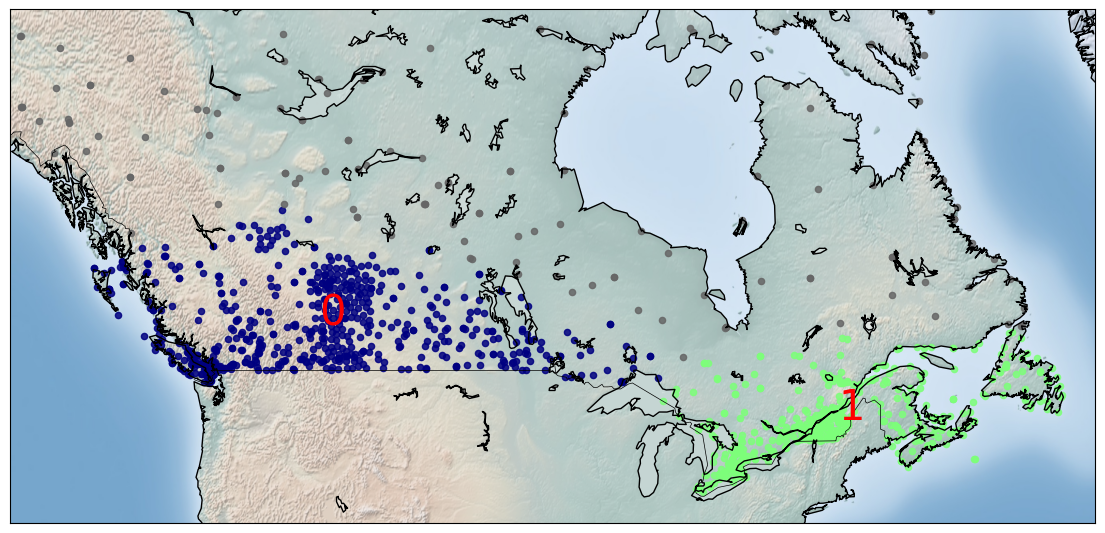

In [69]:
# Visualisation of clusters based on location
def plot_clusters_map(llon, ulon, llat, ulat, labels):
    rcParams['figure.figsize'] = (14, 10)

    my_map = Basemap(
        projection='merc',
        resolution='l',
        area_thresh=1000.0,
        llcrnrlon=llon,
        llcrnrlat=llat,  # min longitude (llcrnrlon) and latitude (llcrnrlat)
        urcrnrlon=ulon,
        urcrnrlat=ulat
    )  # max longitude (urcrnrlon) and latitude (urcrnrlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    #my_map.drawmapboundary()
    my_map.fillcontinents(color='white', alpha=0.3)
    my_map.shadedrelief()

    # To create a color map
    colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

    #Visualization1
    for clust_number in set(labels):
      
        c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]

        clust_set = df[df.cluster == clust_number]
        my_map.scatter(
            clust_set.xm, clust_set.ym, color=c, marker='o', s=20, alpha=0.85
        )
        if clust_number != -1:
            cenx = np.mean(clust_set.xm)
            ceny = np.mean(clust_set.ym)
            plt.text(
                cenx,
                ceny,
                str(clust_number),
                fontsize=30,
                color='red',
                  )
            print(
                "Cluster " + str(clust_number) + ', Avg Temp: ' +
                str(np.mean(clust_set.Tm))
            )


plot_clusters_map(llon, ulon, llat, ulat, labels)

In [70]:
Clus_dataSet = df[['xm', 'ym', 'Tx', 'Tm', 'Tn']]

In [71]:
# Data wrangling 
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [72]:
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)

In [76]:
# Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
df['Clus_Db'] = labels

# Number of clusters in labels, ignoring noise if present.
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)

# Remove repetition in labels by turning it into a set.
clusterNum = len(set(labels))

# A sample of clusters
df[['Stn_Name', 'Tx', 'Tm', 'Clus_Db']].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

Cluster 0, Avg Temp: -5.745826513911622
Cluster 1, Avg Temp: -14.89272727272727
Cluster 2, Avg Temp: nan
Cluster 3, Avg Temp: nan
Cluster 4, Avg Temp: nan
Cluster 5, Avg Temp: nan
Cluster 6, Avg Temp: nan
Cluster 7, Avg Temp: nan
Cluster 8, Avg Temp: nan


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


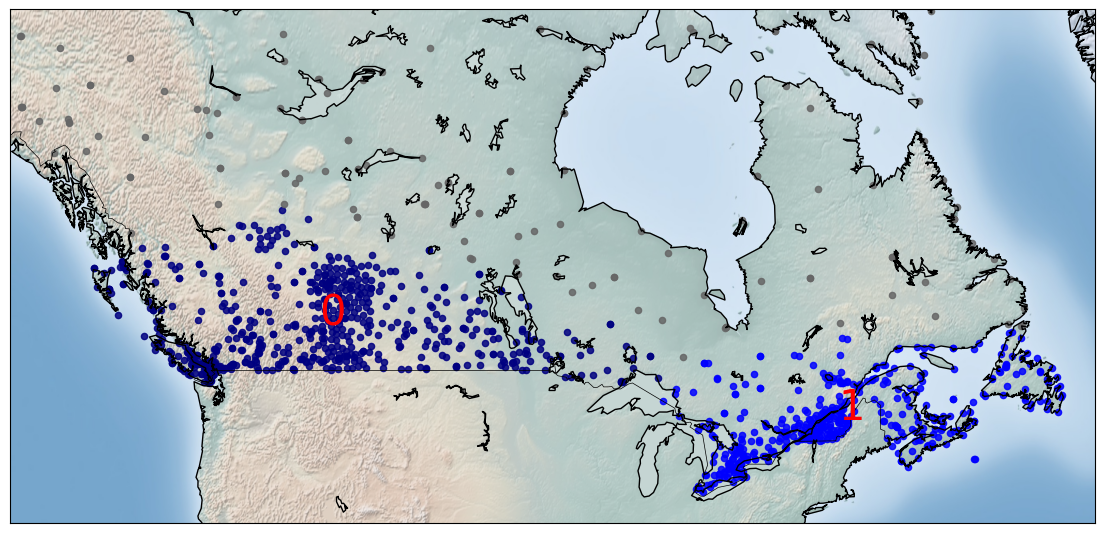

In [77]:
plot_clusters_map(llon, ulon, llat, ulat, labels)
